In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
# from scipy.stats import chi2
from statsmodels.graphics.gofplots import qqplot

# import seaborn as sns

In [0]:
wine_data = pd.read_csv('wine_dataset.csv')
wine_data.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine Type
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,One
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,One
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,One
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,One
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,One


In [0]:
wine_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [0]:
wine_data.columns

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline', 'Wine Type'],
      dtype='object')

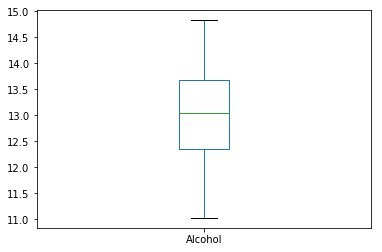

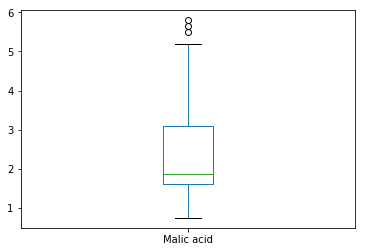

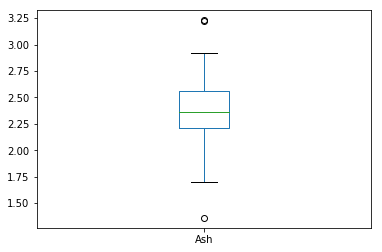

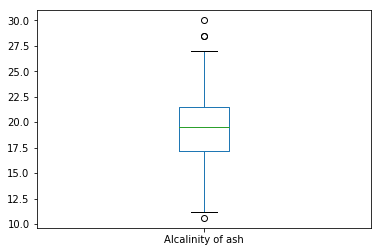

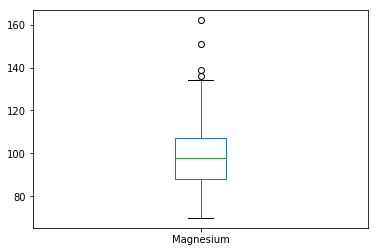

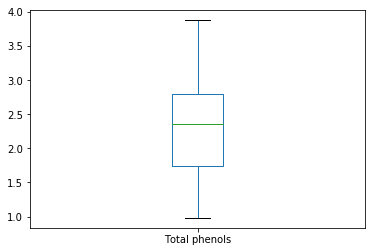

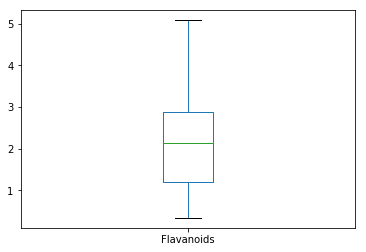

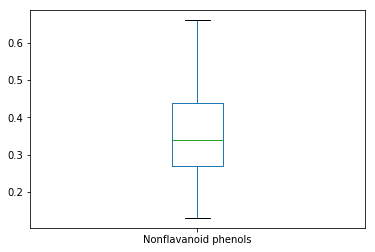

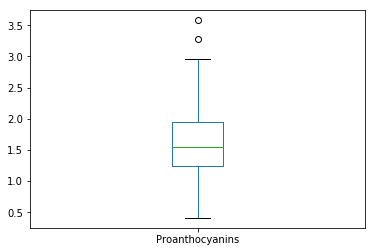

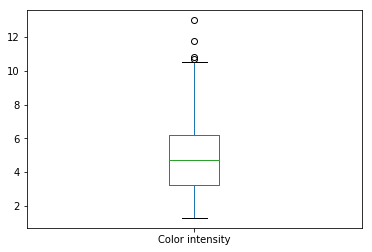

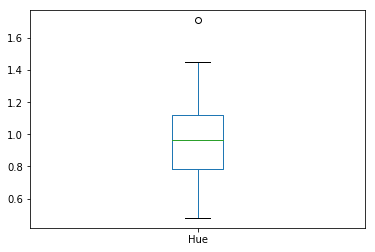

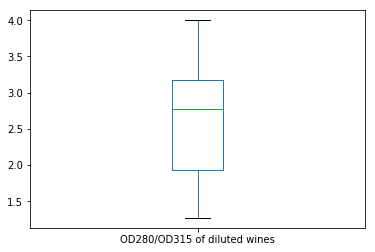

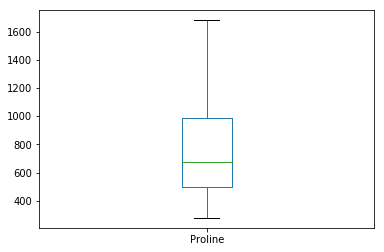

In [0]:
for column in wine_data:
    if wine_data[column].dtype in ['float64', 'int64']:
        plt.figure()
        wine_data[column].plot(kind='box')

In [0]:
outlier_list = ['Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Proanthocyanins', 'Color intensity', 'Hue', 'Proline']
for outlier in outlier_list:
    q1 = wine_data[outlier].quantile(0.25)
    q3 = wine_data[outlier].quantile(0.75)
    iqr = q3-q1
    a = q1-1.5*iqr
    b = q3+1.5*iqr
    wine_data = wine_data[wine_data[outlier]>a]
    wine_data = wine_data[wine_data[outlier]<b]

In [0]:
wine_data.shape
#verification of removal of outliers

(161, 14)

In [0]:
wine_data[wine_data['Wine Type'] == 'One'].describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,57.0,13.745789,0.453167,12.85,13.41,13.75,14.10,14.83
Malic acid,57.0,2.012456,0.700462,1.35,1.66,1.76,1.92,4.04
Ash,57.0,2.443509,0.206791,2.04,2.29,2.44,2.61,2.87
Alcalinity of ash,57.0,16.985965,2.264354,11.20,16.00,16.80,18.60,22.50
Magnesium,57.0,106.105263,10.402067,89.00,98.00,104.00,113.00,132.00
Total phenols,57.0,2.835789,0.338252,2.20,2.60,2.80,3.00,3.88
Flavanoids,57.0,2.976140,0.392746,2.19,2.68,2.98,3.24,3.93
Nonflavanoid phenols,57.0,0.286842,0.067033,0.17,0.25,0.28,0.32,0.50
Proanthocyanins,57.0,1.880351,0.394253,1.25,1.62,1.86,2.08,2.91
Color intensity,57.0,5.527895,1.204843,3.52,4.60,5.40,6.20,8.90


In [0]:
wine_data[wine_data['Wine Type'] == 'Two'].describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,61.0,12.303770,0.517720,11.41,12.00,12.29,12.52,13.86
Malic acid,61.0,1.896393,0.921931,0.74,1.29,1.61,2.16,4.43
Ash,61.0,2.251803,0.266705,1.70,2.02,2.27,2.42,2.92
Alcalinity of ash,61.0,20.101639,2.623515,15.00,18.00,20.00,22.00,26.50
Magnesium,61.0,90.950820,10.376940,70.00,85.00,88.00,98.00,134.00
Total phenols,61.0,2.217705,0.537210,1.10,1.88,2.20,2.55,3.52
Flavanoids,61.0,2.035410,0.598135,0.99,1.60,2.01,2.29,3.75
Nonflavanoid phenols,61.0,0.367377,0.121805,0.13,0.27,0.37,0.43,0.66
Proanthocyanins,61.0,1.534426,0.488564,0.41,1.35,1.48,1.77,2.91
Color intensity,61.0,3.091803,0.894014,1.28,2.50,2.94,3.40,5.75


In [0]:
wine_data[wine_data['Wine Type'] == 'Three'].describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,43.0,13.128605,0.508094,12.20,12.815,13.16,13.495,14.16
Malic acid,43.0,3.321860,0.970710,1.24,2.675,3.27,3.905,5.19
Ash,43.0,2.420233,0.185003,2.10,2.290,2.37,2.560,2.86
Alcalinity of ash,43.0,21.232558,2.236996,17.50,19.750,21.00,22.750,27.00
Magnesium,43.0,99.465116,11.206607,80.00,89.500,97.00,106.000,123.00
Total phenols,43.0,1.633256,0.298502,0.98,1.400,1.62,1.800,2.32
Flavanoids,43.0,0.756512,0.277925,0.34,0.570,0.68,0.835,1.57
Nonflavanoid phenols,43.0,0.442791,0.122442,0.17,0.395,0.45,0.530,0.63
Proanthocyanins,43.0,1.092093,0.308125,0.55,0.835,1.04,1.325,1.87
Color intensity,43.0,7.134186,2.071756,3.85,5.425,7.30,8.835,10.68


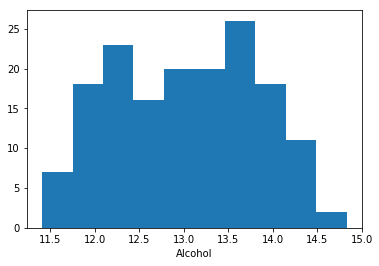

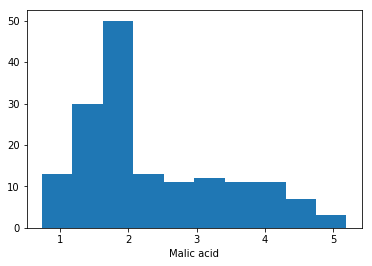

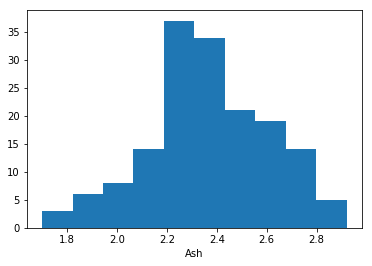

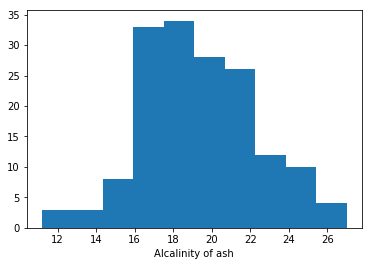

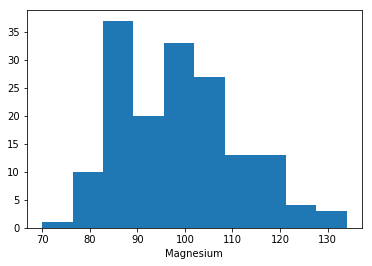

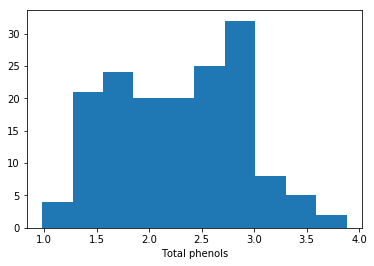

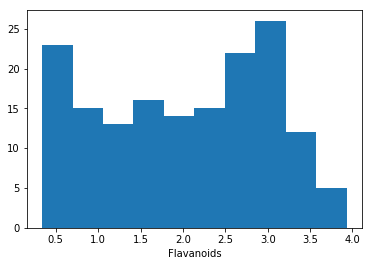

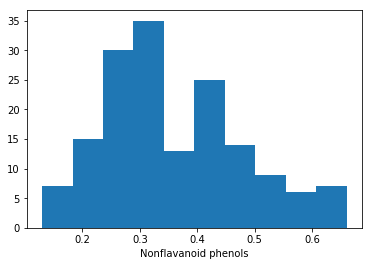

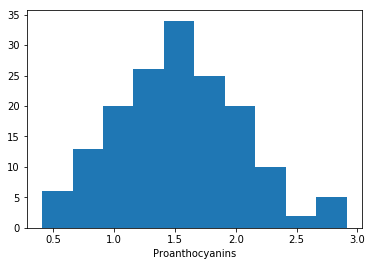

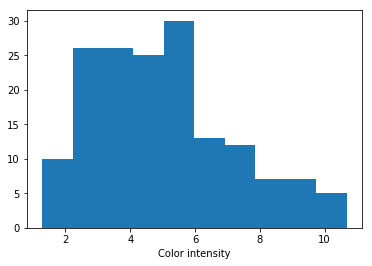

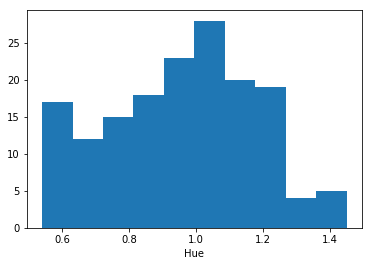

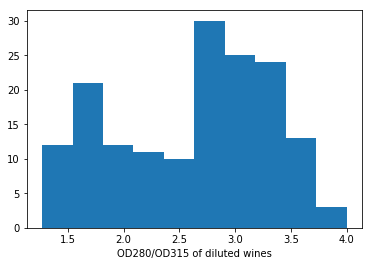

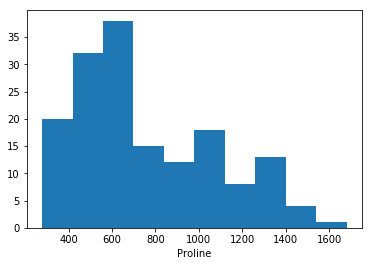

In [0]:
for column in list(wine_data.columns)[:-1]:
    if wine_data[column].dtype in ['float64', 'int64']:
        plt.figure()
        plt.hist(wine_data[column])
        plt.xlabel(column)

<Figure size 432x288 with 0 Axes>

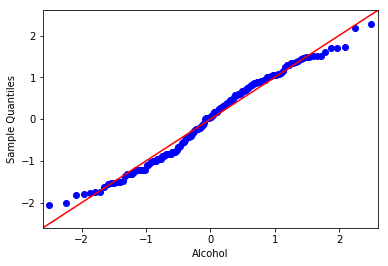

<Figure size 432x288 with 0 Axes>

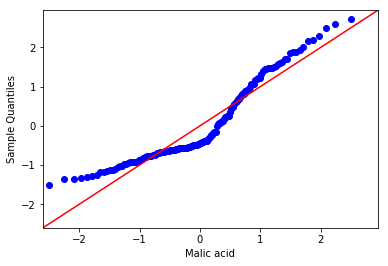

<Figure size 432x288 with 0 Axes>

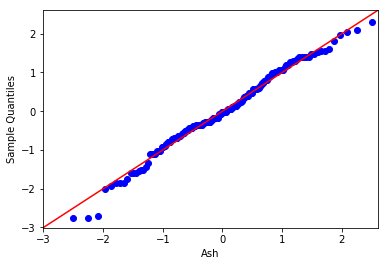

<Figure size 432x288 with 0 Axes>

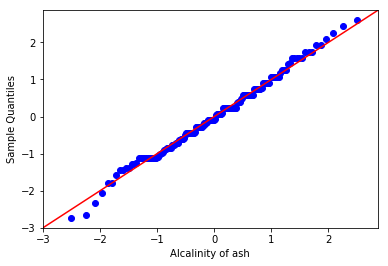

<Figure size 432x288 with 0 Axes>

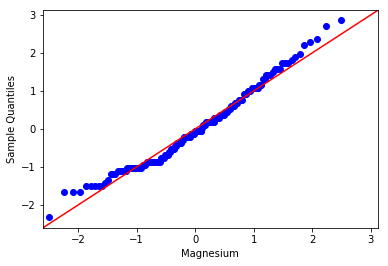

<Figure size 432x288 with 0 Axes>

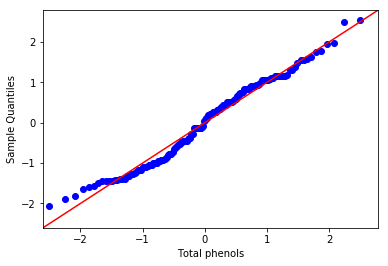

<Figure size 432x288 with 0 Axes>

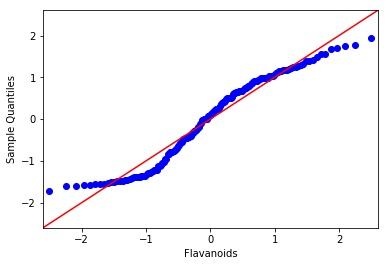

<Figure size 432x288 with 0 Axes>

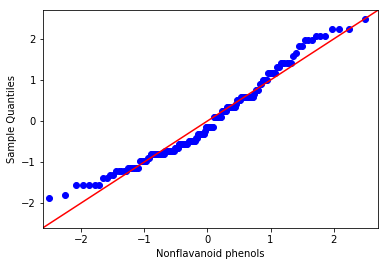

<Figure size 432x288 with 0 Axes>

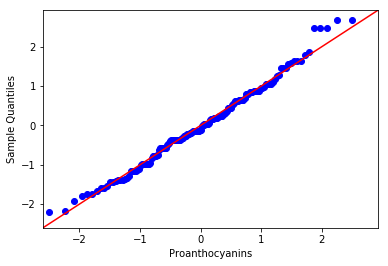

<Figure size 432x288 with 0 Axes>

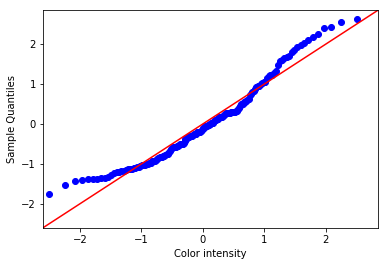

<Figure size 432x288 with 0 Axes>

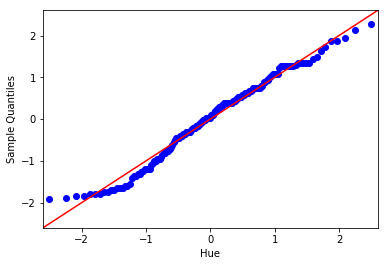

<Figure size 432x288 with 0 Axes>

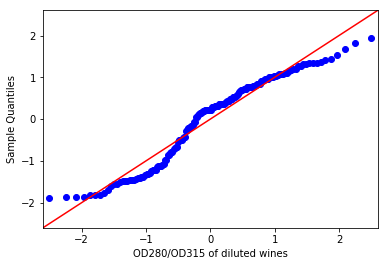

<Figure size 432x288 with 0 Axes>

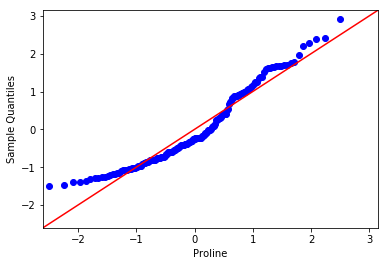

In [0]:
for column in list(wine_data.columns)[:-1]:
    if wine_data[column].dtype in ['float64', 'int64']:
        plt.figure()
        qqplot(wine_data[column], dist=stats.norm, line='45', fit=True)
        plt.xlabel(column)
        lt.show()

In [0]:
cat1 = wine_data[wine_data['Wine Type'] == 'One'].copy()
cat2 = wine_data[wine_data['Wine Type'] == 'Two'].copy()
cat3 = wine_data[wine_data['Wine Type'] == 'Three'].copy()

def get_samples(df):
#     return np.random.choice(arr, size = round(len(arr)*0.20), replace=False, p=None)
    return df.sample(frac=0.4, replace=False)

sample1 = pd.DataFrame(get_samples(cat1))
# print(sample1)
sample2 = pd.DataFrame(get_samples(cat2))
# print(sample2)
sample3 = pd.DataFrame(get_samples(cat3))
# print(sample3)
merged_sample = [sample1, sample2, sample3]

merged_sample_df = pd.concat(merged_sample)
merged_sample_df

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine Type,encode_wt
16,14.30,1.92,2.72,20.0,120,2.80,3.14,0.33,1.97,6.200000,1.07,2.65,1280,One,2
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065,One,2
36,13.28,1.64,2.84,15.5,110,2.60,2.68,0.34,1.36,4.600000,1.09,2.78,880,One,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050,One,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185,One,2
52,13.82,1.75,2.42,14.0,111,3.88,3.74,0.32,1.87,7.050000,1.01,3.26,1190,One,2
20,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.650000,1.09,3.71,780,One,2
19,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.100000,0.96,3.36,845,One,2
53,13.77,1.90,2.68,17.1,115,3.00,2.79,0.39,1.68,6.300000,1.13,2.93,1375,One,2
23,12.85,1.60,2.52,17.8,95,2.48,2.37,0.26,1.46,3.930000,1.09,3.63,1015,One,2


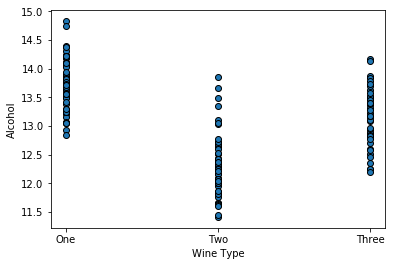

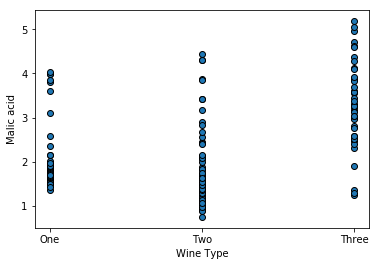

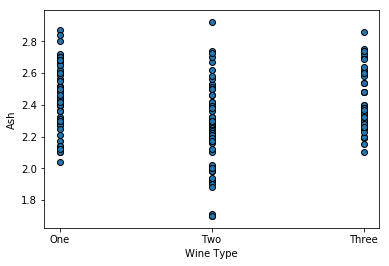

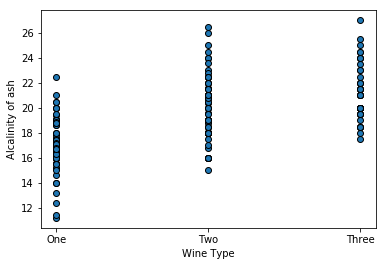

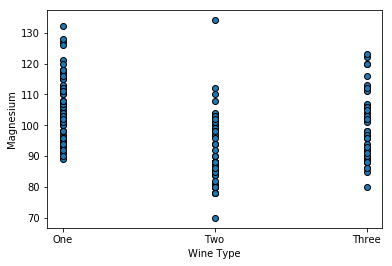

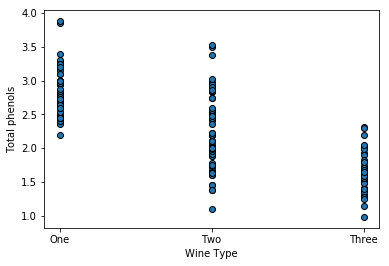

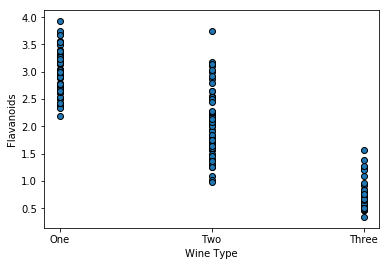

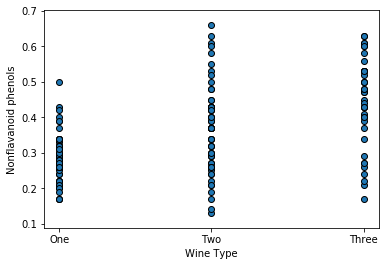

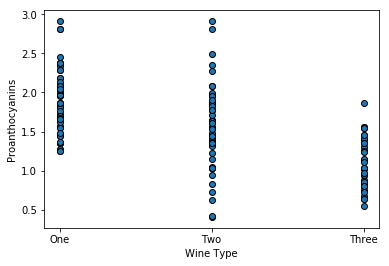

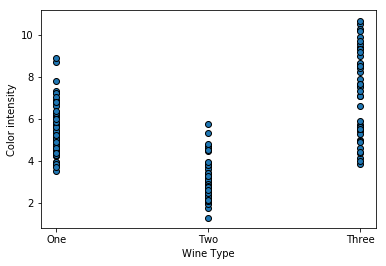

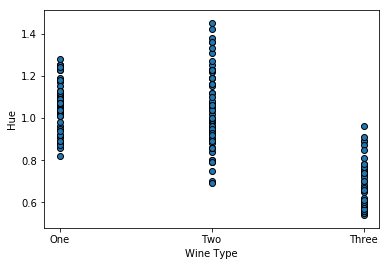

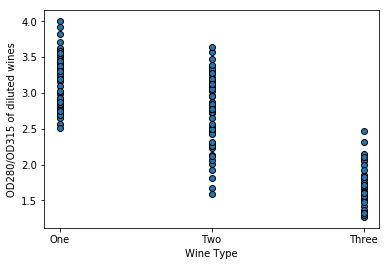

In [0]:
for column in list(wine_data.columns)[:-2]:
    plt.figure()
    plt.scatter(wine_data['Wine Type'], wine_data[column], edgecolors='black')
    plt.xlabel('Wine Type')
    plt.ylabel(column)

In [0]:
wine_data['encode_wt'] = 0

In [0]:
wine_data['encode_wt'][wine_data['Wine Type'] == 'One'] = 2
wine_data['encode_wt'][wine_data['Wine Type'] == 'Two'] = 1
wine_data['encode_wt'][wine_data['Wine Type'] == 'Three'] = 0

wine_data['encode_wt'].dtype

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


dtype('int64')

In [0]:
wine_data.corr()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,encode_wt
Alcohol,1.000000,0.096651,0.225343,-0.338434,0.421233,0.325599,0.302557,-0.175275,0.215463,0.540855,-0.010480,0.108512,0.652425,0.366803
Malic acid,0.096651,1.000000,0.183716,0.311024,0.030146,-0.369455,-0.460262,0.299642,-0.241993,0.304192,-0.582454,-0.399525,-0.182090,-0.457475
Ash,0.225343,0.183716,1.000000,0.320691,0.421118,0.106043,0.043875,0.090586,0.031043,0.210859,-0.043165,-0.032896,0.271846,0.069204
Alcalinity of ash,-0.338434,0.311024,0.320691,1.000000,-0.176902,-0.453056,-0.507433,0.340402,-0.308068,-0.031718,-0.318442,-0.375677,-0.472429,-0.575033
Magnesium,0.421233,0.030146,0.421118,-0.176902,1.000000,0.239446,0.199186,-0.235835,0.099609,0.346902,-0.021651,0.021406,0.449599,0.250621
Total phenols,0.325599,-0.369455,0.106043,-0.453056,0.239446,1.000000,0.882622,-0.497526,0.642021,-0.065892,0.471543,0.706372,0.515427,0.752270
Flavanoids,0.302557,-0.460262,0.043875,-0.507433,0.199186,0.882622,1.000000,-0.597872,0.737851,-0.171084,0.589664,0.784737,0.524336,0.881268
Nonflavanoid phenols,-0.175275,0.299642,0.090586,0.340402,-0.235835,-0.497526,-0.597872,1.000000,-0.430748,0.110328,-0.279525,-0.525896,-0.310505,-0.503821
Proanthocyanins,0.215463,-0.241993,0.031043,-0.308068,0.099609,0.642021,0.737851,-0.430748,1.000000,-0.041662,0.345698,0.585839,0.367174,0.598729
Color intensity,0.540855,0.304192,0.210859,-0.031718,0.346902,-0.065892,-0.171084,0.110328,-0.041662,1.000000,-0.484898,-0.425764,0.360802,-0.229396


In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = wine_data[['OD280/OD315 of diluted wines',"Flavanoids", 'Proline', 'Total phenols']] #independent variables
y = wine_data["encode_wt"] #depedent variables
model.fit(X,y)
print("Intercept:", model.intercept_,"\nCoefficients:",model.coef_)

Intercept: -0.9250168984901097 
Coefficients: [ 0.38753641  0.50368073  0.00076688 -0.26412455]


In [0]:
model.score(X, y)

0.8742738842621166

In [0]:
y_pred = 0